<a href="https://colab.research.google.com/github/gombergere/arthomas/blob/master/TFLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
#Article tres interessant. Il montre deja comment initialiser un modele Keras
#...comment utiliser les modeles de reference de la reconnaissance d'images
#...comment utiliser les fonctions de traitement et d'affichage d'images
#...et évidemment coment utiliser un modéle déja entrainé pour lui faire recoonaitre de nouvelles images
#...pour la demo, charger une nouvelle image de chien...lancer  le modéle et noter le résultat
#Ici c'est une variante du TransferLearning d'origine, beaucoup plus intéressante puisque le modèle d'origine est modifié de façon à identifier
#...des nouveaux "chiens" qui ne figurent pas dans le "dataset" d'origine...Bon ça ne change pas grand-chose !!
#...néanmoins il y a plusieurs instructons de base intéressantes au plan grammatical

In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
image.ImageDataGenerator()
#image.load_img()

mobile =keras.applications.mobilenet.MobileNet()

def prepare_image(file):
    img_path = 'MobileNet-inference-images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return 
    keras.applications.mobilenet.preprocess_imput(img_array_expanded_dims)

In [4]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()


553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [0]:
# load an image from file
image = load_img('dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [5]:
from google.colab import files
file=files.upload()

Saving dog.jpg to dog.jpg


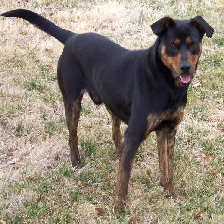

In [7]:
from keras.preprocessing import image
# and use 
image.ImageDataGenerator()
image.load_img('dog.jpg', target_size=(224, 224))

In [11]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
Doberman (33.59%)


In [0]:
# load model
model = VGG16()
# remove the output layer
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

In [14]:
# get extracted features
features = model.predict(image)
print(features.shape)
# save to file
#dump(features, open('dog.pkl', 'wb'))
features, open('dog.pkl', 'wb')

(1, 4096)


(array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 <_io.BufferedWriter name='dog.pkl'>)

In [15]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [18]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# add new classifier layers
flat1 = Flatten()(model.outputs)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

In [0]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False

In [0]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark some layers as not trainable
model.get_layer('block1_conv1').trainable = False
model.get_layer('block1_conv2').trainable = False
model.get_layer('block2_conv1').trainable = False
model.get_layer('block2_conv2').trainable = False

In [23]:
from google.colab import files
file=files.upload()

Saving dog4.jpg to dog4.jpg


In [24]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('dog4.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

German_shepherd (98.85%)
